In [1]:
%matplotlib inline

In [2]:
import csv
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sklearn.utils

from keras.layers import Flatten, Dense, Lambda
from keras.layers import Conv2D, AveragePooling2D
from keras.layers import Cropping2D
from keras.models import Sequential
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from random import shuffle

Using TensorFlow backend.


In [3]:
train_data_path = './data'
train_img = train_data_path + '/IMG/'

epochs = 3
batch_size = 32

# image correction
correction = 0.2

line_buffs = []
with open(os.path.join(train_data_path, 'driving_log.csv'), 'r') as csvfile:
    reader = csv.reader(csvfile)

    for _ in reader:
        line_buffs.append(_)

    del line_buffs[0]
    

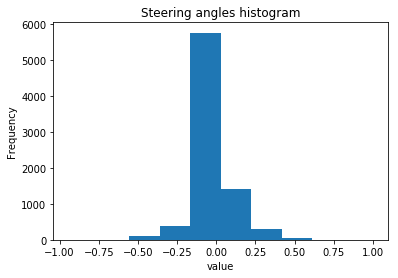

In [4]:
output_steerings = []
for buff in line_buffs:
    output_steerings.append(float(buff[3]))

plt.hist(output_steerings)
plt.title('Steering angles histogram')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.gcf()
plt.show()

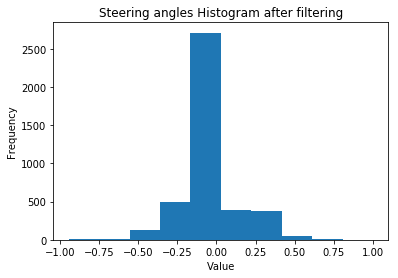

In [5]:
lines = []
output_values_steering = []
center_counter1 = 0
for line in line_buffs:
    center_value = float(line[3])
    if center_value < 0.0 or center_value > 0.2:
        output_values_steering.append(center_value)
        lines.append(line)
    if center_value >= 0.0 or center_value <= 0.2:
        if center_counter1 >= 4:
            output_values_steering.append(center_value)
            lines.append(line)
            center_counter1 = 0
        center_counter1 += 1

plt.hist(output_values_steering)
plt.title("Steering angles Histogram after filtering")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.gcf()
plt.show()

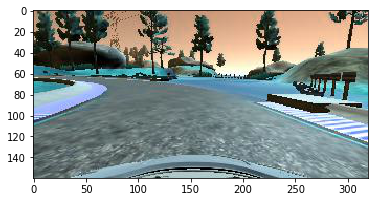

In [6]:
image = cv2.imread('./data/' + lines[1][0])
plt.imshow(image)

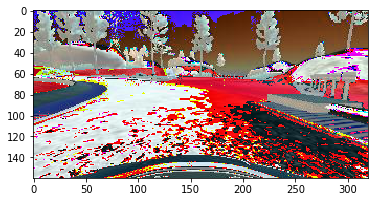

In [7]:
image_normal = image / 255.0 - 0.5
plt.imshow(image_normal)

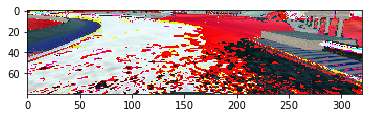

In [8]:
image_crop = image_normal[60:140,:,:]
plt.imshow(image_crop)